In [14]:
# functions needed for MO-ASMO calibration for one basin
# Gong et al., (2015) Multiobjective adaptive surrogate modeling-based optimization for parameter estimation of large, complex geophysical models, WRR
# https://github.com/gongw03/MO-ASMO

import os, sys, subprocess, time, toml
import pandas as pd
import numpy as np

sys.path.append('../MOASMO_support')

from MOASMO_parameters import generate_initial_parameter_sets, surrogate_model_train_and_pareto_points

In [15]:

# inputs
file_parameter_list = '/glade/u/home/guoqiang/CTSM_repos/CTSM_calibration/src/parameter/CTSM_CAMELS_SA_param_240202.csv'
path_CTSM_base = '/glade/work/guoqiang/CTSM_CAMELS/SA_HH_allbasins/level1'
script_singlerun = '/glade/u/home/guoqiang/CTSM_repos/moasmo_test/run_one_paramset.py'
script_clone = '/glade/u/home/guoqiang/CTSM_repos/CTSM/cime/scripts/create_clone'

# outputs
path_paramset = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/param_sets'
path_submit = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/run_model'
path_archive = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/ctsm_outputs'

# MO-ASMO parameters
sampling_method = 'lh'
num_init = 200

In [16]:
print('Generating initial parameters')
init_param_filelist = generate_initial_parameter_sets(file_parameter_list, sampling_method, path_paramset, path_CTSM_base, num_init, adddefault=False)


Generating initial parameters
Load default parameter values from: /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/param_sets/all_default_parameters.pkl
Generating parameter file: /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/param_sets/paramset_iter0_trial0.pkl
Generating parameter file: /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/param_sets/paramset_iter0_trial1.pkl
Generating parameter file: /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/param_sets/paramset_iter0_trial2.pkl
Generating parameter file: /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/param_sets/paramset_iter0_trial3.pkl
Generating parameter file: /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/param_sets/paramset_iter0_trial4.pkl
Generating parameter file: /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbas

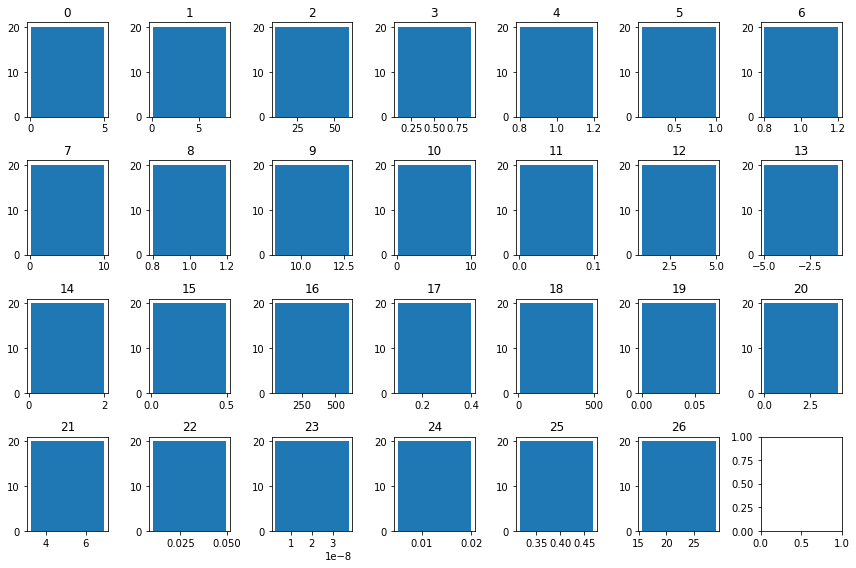

In [17]:
# visualize some parameters to check whether parameters are correctly generated
import matplotlib.pyplot as plt

nparam = 27
params = np.nan * np.zeros([num_init, nparam])

for i in range(num_init):
    file = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/param_sets/paramset_iter0_trial{i}.pkl'
    df = pd.read_pickle(file)
    va = df['Value'].values
    for j in range(nparam):
        params[i, j]=np.mean(va[j])


fig, axs = plt.subplots(4, 7, figsize=[12, 8])
axs = axs.flatten()

for i in range(nparam):
    ax = axs[i]
    ax.hist(params[:,i])
    ax.set_title(i)
        
plt.tight_layout()
plt.show()

In [18]:
df = pd.read_csv(file_parameter_list)
df['Parameter'].values

array(['fff', 'e_ice', 'd_max', 'FMAX', 'om_frac_sf',
       'interception_fraction', 'watsat_sf', 'sucsat_sf', 'bsw_sf',
       'zbedrock', 'hksat_sf', 'baseflow_scalar', 'n_baseflow',
       'slopebeta', 'liq_canopy_storage_scalar',
       'maximum_leaf_wetted_fraction', 'n_melt_coef', 'accum_factor',
       'upplim_destruct_metamorph', 'zsno',
       'precip_repartition_nonglc_all_rain_t', 'medlynslope', 'jmaxb0',
       'kmax', 'cv', 'taulnir', 'leafcn'], dtype=object)

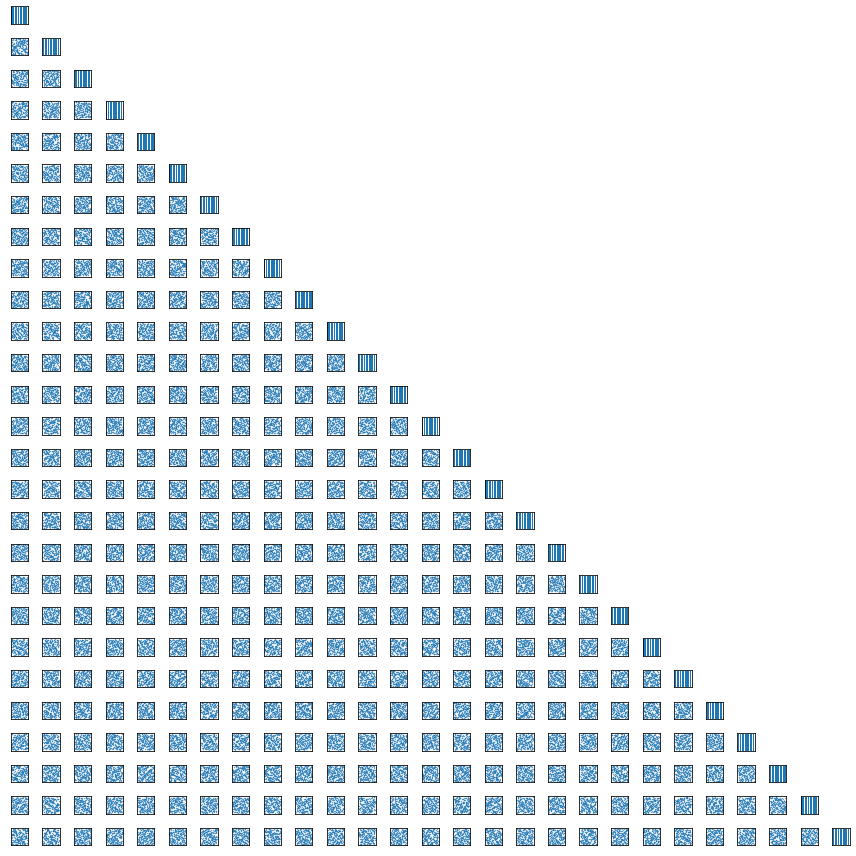

In [19]:
fig, axs = plt.subplots(nparam, nparam, figsize=[12, 12])

for i in range(nparam):
    for j in range(nparam):
        ax = axs[i, j]
        
        if j>i:
            ax.axis('off')
            
        elif j==i:
            ax.hist(params[:,i], rwidth=0.7)
            
            # Hide X and Y axes label marks
            ax.xaxis.set_tick_params(labelbottom=False)
            ax.yaxis.set_tick_params(labelleft=False)

            # Hide X and Y axes tick marks
            ax.set_xticks([])
            ax.set_yticks([])
            
        else:
        
            ax.scatter(params[:,i], params[:,j], 0.1)

            # Hide X and Y axes label marks
            ax.xaxis.set_tick_params(labelbottom=False)
            ax.yaxis.set_tick_params(labelleft=False)

            # Hide X and Y axes tick marks
            ax.set_xticks([])
            ax.set_yticks([])
        
plt.tight_layout()
plt.show()